In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

sns.set_style("darkgrid")
DEUmonthyearAc2 = pd.read_csv('queries_results/DEU/DEU monthyear ac2 count.csv', header = 0,sep=' *, *')
DEUmonthyearAc2["Time"]=pd.to_datetime(DEUmonthyearAc2['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')

/home/micha/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


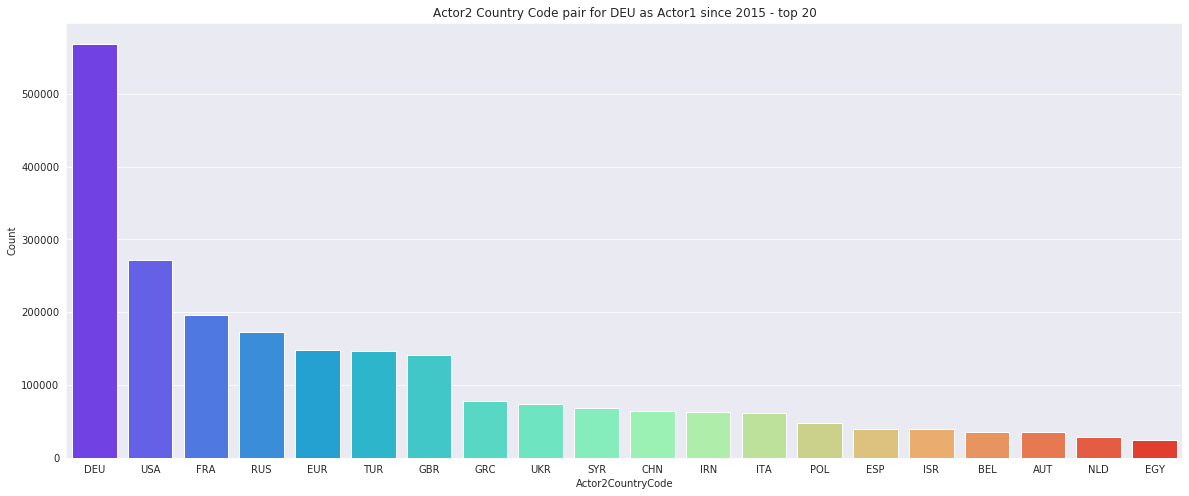

In [2]:
ile = 20
s = DEUmonthyearAc2.groupby("Actor2CountryCode").sum().sort_values(by="Count", ascending=False).head(ile)
g = sns.barplot(s.index, s.Count, palette='rainbow')
g.set_title("Actor2 Country Code pair for DEU as Actor1 since 2015 - top {}".format(ile))
g.set(ylabel='Count')
g.figure.set_size_inches(20,8)
plt.savefig('text/fig/DEU/DEUactor2Pair.png', bbox_inches='tight')


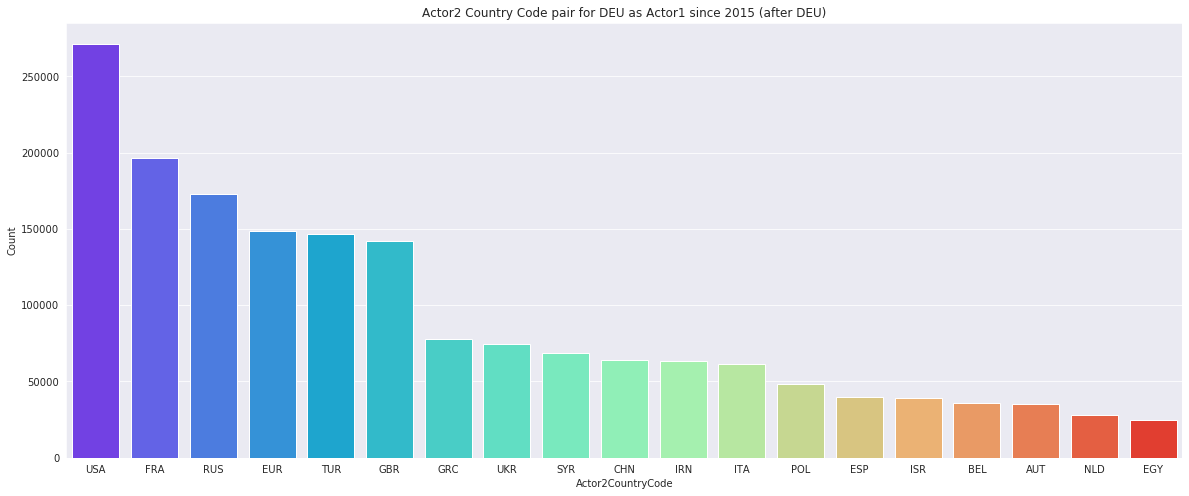

In [3]:
s = DEUmonthyearAc2.groupby("Actor2CountryCode").sum().sort_values(by="Count", ascending=False).head(20)[1:]
g = sns.barplot(s.index, s.Count, palette='rainbow')
g.set_title("Actor2 Country Code pair for DEU as Actor1 since 2015 (after DEU)")
g.set(ylabel='Count')
g.figure.set_size_inches(20,8)

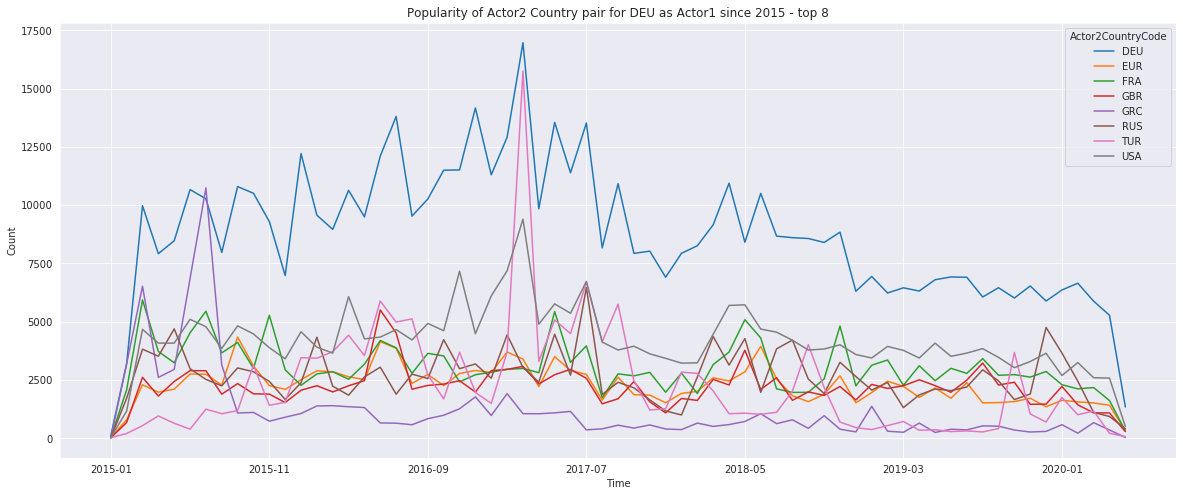

In [4]:
ile = 8
cols = DEUmonthyearAc2.groupby("Actor2CountryCode", as_index=False).sum().sort_values(by="Count", ascending=False).head(ile)['Actor2CountryCode']
s  = DEUmonthyearAc2.loc[DEUmonthyearAc2["Actor2CountryCode"].isin(cols)]

s = s.groupby(["Time","Actor2CountryCode"]).agg({'Count':'sum'})
g = s.unstack().plot(y='Count')
g.set(ylabel='Count')
g.set_title("Popularity of Actor2 Country pair for DEU as Actor1 since 2015 - top {}".format(ile))
g.figure.set_size_inches(20,8)

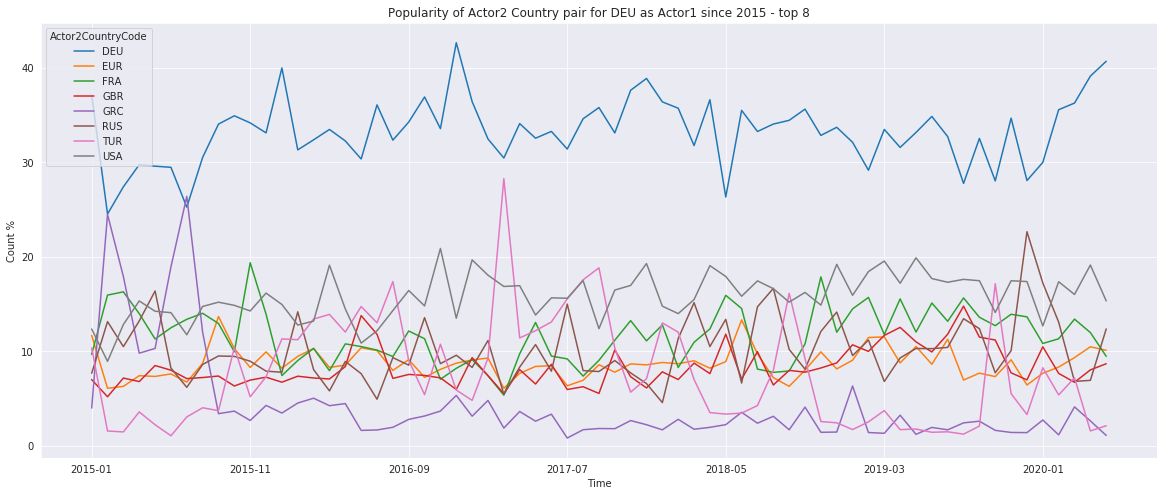

In [5]:
s['%']= s.groupby(level=0).apply(lambda x:  100*x / x.sum())

g = s.unstack().plot(y='%')
g.set(ylabel='Count %')
g.set_title("Popularity of Actor2 Country pair for DEU as Actor1 since 2015 - top {}".format(ile))
g.figure.set_size_inches(20,8)
plt.savefig('text/fig/DEU/DEUactor2PairPercinTIME.png', bbox_inches='tight')